# HW4: Classification 1

## Load the dataset 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 

##load the dataset
MarketCam_file = pd.read_csv("/Users/mgh/MGH/CE/waterloo/ECE 657A/Homework/bank/bank.csv", header=0, sep=';')
MarketCam_file.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data cleaning

In [2]:
## check missing value
MarketCam_file.info()    # no missing value was found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [3]:
## drop the categorical (object) feature based on the specific objectives

ObjConvCat = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for i in ObjConvCat:
    del MarketCam_file[i]

## drop the column ['duration'] based on the data description
## This input(duration) should only be included for benchmark purposes and sould be discarded if the intention is to have a realistic predictive model 

del MarketCam_file['duration']


In [4]:
MarketCam_file.info()
MarketCam_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
age         4521 non-null int64
balance     4521 non-null int64
day         4521 non-null int64
campaign    4521 non-null int64
pdays       4521 non-null int64
previous    4521 non-null int64
y           4521 non-null object
dtypes: int64(6), object(1)
memory usage: 247.3+ KB


,age,balance,day,campaign,pdays,previous,y
0,30,1787,19,1,-1,0,no
1,33,4789,11,1,339,4,no
2,35,1350,16,1,330,1,no
3,30,1476,3,4,-1,0,no
4,59,0,5,1,-1,0,no


## Balanced or inbalanced?

In [5]:
## check the dataset whether it is balanced or inbalanced
MarketCam_file.groupby('y').size()

y
no     4000
yes     521
dtype: int64

In [6]:
'''Inbalanced dataset!!!'''

'Inbalanced dataset!!!'

## Solution to inbalance data ( k-fold cross validation)

### Clean the dataset

In [7]:
## split dataset into feature dataset and label dataset
## nomalize the feature
from sklearn.preprocessing import MinMaxScaler

FeaData = MarketCam_file.iloc[:,0:6]  # feature dataset
X = FeaData.values
X_scaled = MinMaxScaler().fit_transform(X)
FeaData = pd.DataFrame(X_scaled)
#FeaData.head()

LabData = MarketCam_file.iloc[:,6]    # label dataset
LabData.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [8]:
## change categorical label to numerical label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y1 =le.fit_transform(LabData)

LabData2 = pd.DataFrame(y1, columns= ['y'])
LabData2.head()

,y
0,0
1,0
2,0
3,0
4,0


In [9]:
## cleaned dataset
MarketCam_file = pd.concat([FeaData,LabData2],axis=1)

MarketCam_file.head()

,0,1,2,3,4,5,y
0,0.161765,0.068455,0.600000,0.000000,0.000000,0.00,0
1,0.205882,0.108750,0.333333,0.000000,0.389908,0.16,0
2,0.235294,0.062590,0.500000,0.000000,0.379587,0.04,0
3,0.161765,0.064281,0.066667,0.061224,0.000000,0.00,0
4,0.588235,0.044469,0.133333,0.000000,0.000000,0.00,0


### Check the correlation 

In [10]:
## check if there are two variables (including y) that have high correlation
MarketCam_file.corr()

,0,1,2,3,4,5,y
0,1.000000,0.083820,-0.017853,-0.005148,-0.008894,-0.003511,0.045092
1,0.083820,1.000000,-0.008677,-0.009976,0.009437,0.026196,0.017905
2,-0.017853,-0.008677,1.000000,0.160706,-0.094352,-0.059114,-0.011244
3,-0.005148,-0.009976,0.160706,1.000000,-0.093137,-0.067833,-0.061147
4,-0.008894,0.009437,-0.094352,-0.093137,1.000000,0.577562,0.104087
5,-0.003511,0.026196,-0.059114,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,-0.061147,0.104087,0.116714,1.000000


<IPython.core.display.Javascript object>


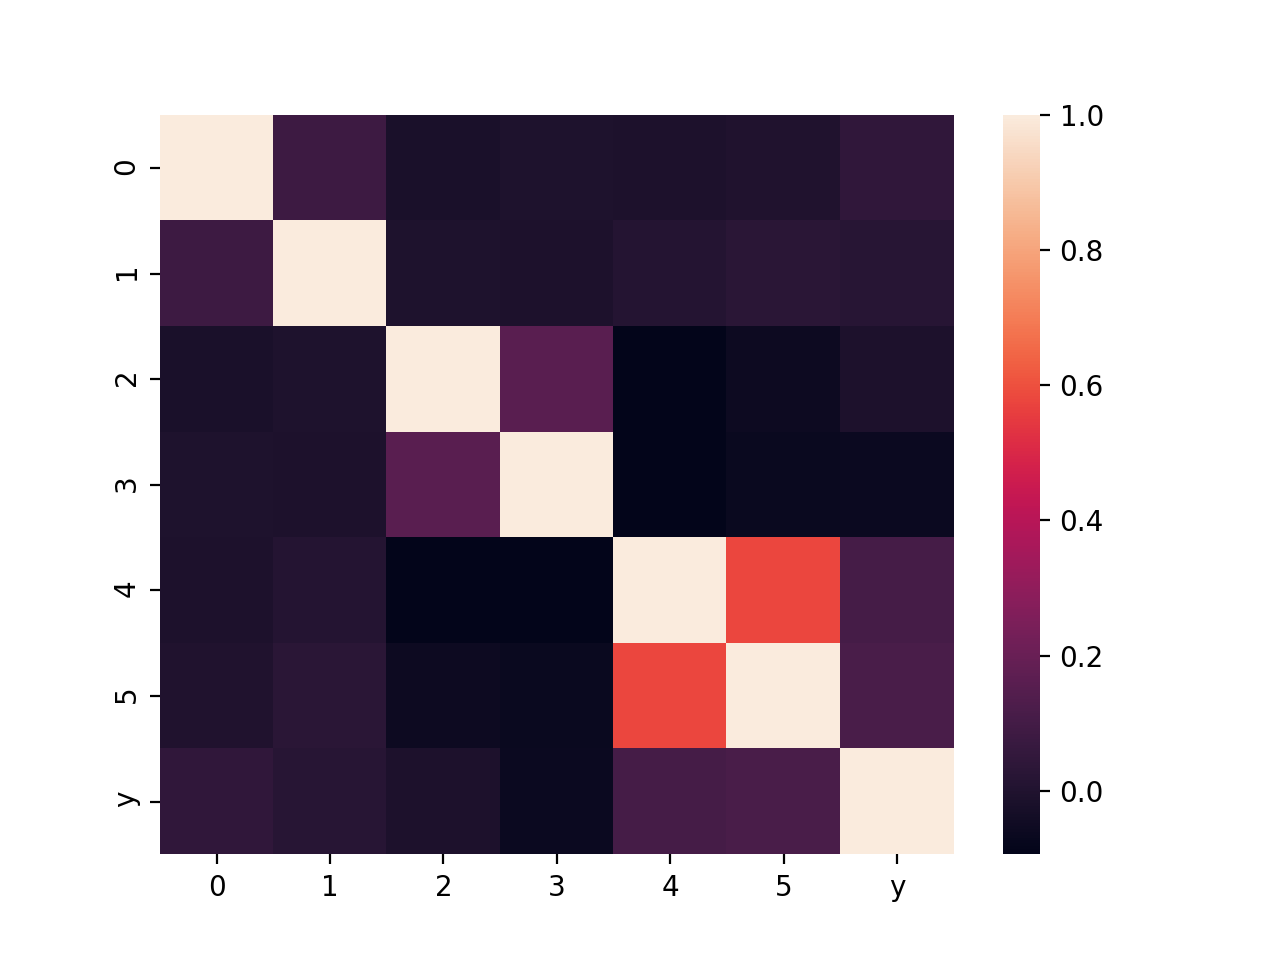

In [11]:
%matplotlib notebook
import seaborn as sns

sns.heatmap(MarketCam_file.corr())

In [12]:
## notice that all the feature have correlation lower than 0.9
## no need for dropping any feature

### Divide the data into train and test portions  (k-fold)

In [13]:
## this part is included in the following sections

## kNN 

### Dataset predicted by kNN 

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn,FeaData.values,LabData2.values,cv=5,scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred = cross_val_predict(knn,FeaData.values, LabData2.values, cv=5)

[0.80331492 0.80641593 0.81858407 0.82743363 0.81415929]
Accuracy: 0.81 (+/- 0.02)


In [15]:
y_pred = pd.DataFrame(y_pred,columns=['y_pred'])
y_pred.head() 

,y_pred
0,0
1,1
2,0
3,0
4,1


In [16]:
# replace 0 with 'No'
# replace 1 with 'Yes'

y_pred[y_pred['y_pred'] == 0]= 'No'
y_pred[y_pred['y_pred'] == 1]= 'Yes'
y_pred.head()
y_pred.groupby('y_pred').size()

y_pred
No     4025
Yes     496
dtype: int64

In [17]:
## dataset predicted by kNN

Features = ['age','balance','day','campaign','pdays','previous']

DataPred = pd.DataFrame(X,columns= Features)
DataPred.insert(loc=6,column = 'y_pred',value = y_pred)
DataPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
age         4521 non-null int64
balance     4521 non-null int64
day         4521 non-null int64
campaign    4521 non-null int64
pdays       4521 non-null int64
previous    4521 non-null int64
y_pred      4521 non-null object
dtypes: int64(6), object(1)
memory usage: 247.3+ KB


In [18]:
DataPred.groupby('y_pred').size()

y_pred
No     4025
Yes     496
dtype: int64

### Justify the split decision

In [19]:
## modify the cv value to change the k value
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn,FeaData.values,LabData2.values,cv=3,scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred = cross_val_predict(knn,FeaData.values, LabData2.values, cv=3)

[0.81100796 0.82282681 0.81806109]
Accuracy: 0.82 (+/- 0.01)


In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn,FeaData.values,LabData2.values,cv=5,scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred = cross_val_predict(knn,FeaData.values, LabData2.values, cv=5)

[0.80331492 0.80641593 0.81858407 0.82743363 0.81415929]
Accuracy: 0.81 (+/- 0.02)


In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn,FeaData.values,LabData2.values,cv=8,scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred = cross_val_predict(knn,FeaData.values, LabData2.values, cv=8)

[0.80388693 0.80707965 0.80353982 0.83362832 0.80707965 0.83539823
 0.83362832 0.81769912]
Accuracy: 0.82 (+/- 0.03)


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn,FeaData.values,LabData2.values,cv=10,scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred = cross_val_predict(knn,FeaData.values, LabData2.values, cv=10)

[0.81015453 0.80309735 0.79424779 0.81415929 0.82964602 0.80309735
 0.82079646 0.83628319 0.82300885 0.82522124]
Accuracy: 0.82 (+/- 0.03)


In [23]:
## we can see when cv = 5, the accuracy and standard diviation tends to be stable 
## cv = 2 gets higher accuracy but the number of fold is too small

### Creat a few two dimensional plots ( Scatterplot Matrix)

In [24]:
## pairplot is useful when you want to visualize the distribution of a variable 
## or the relationship between multiple variables sepatarely withinsubsets of your dataset
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns


<IPython.core.display.Javascript object>


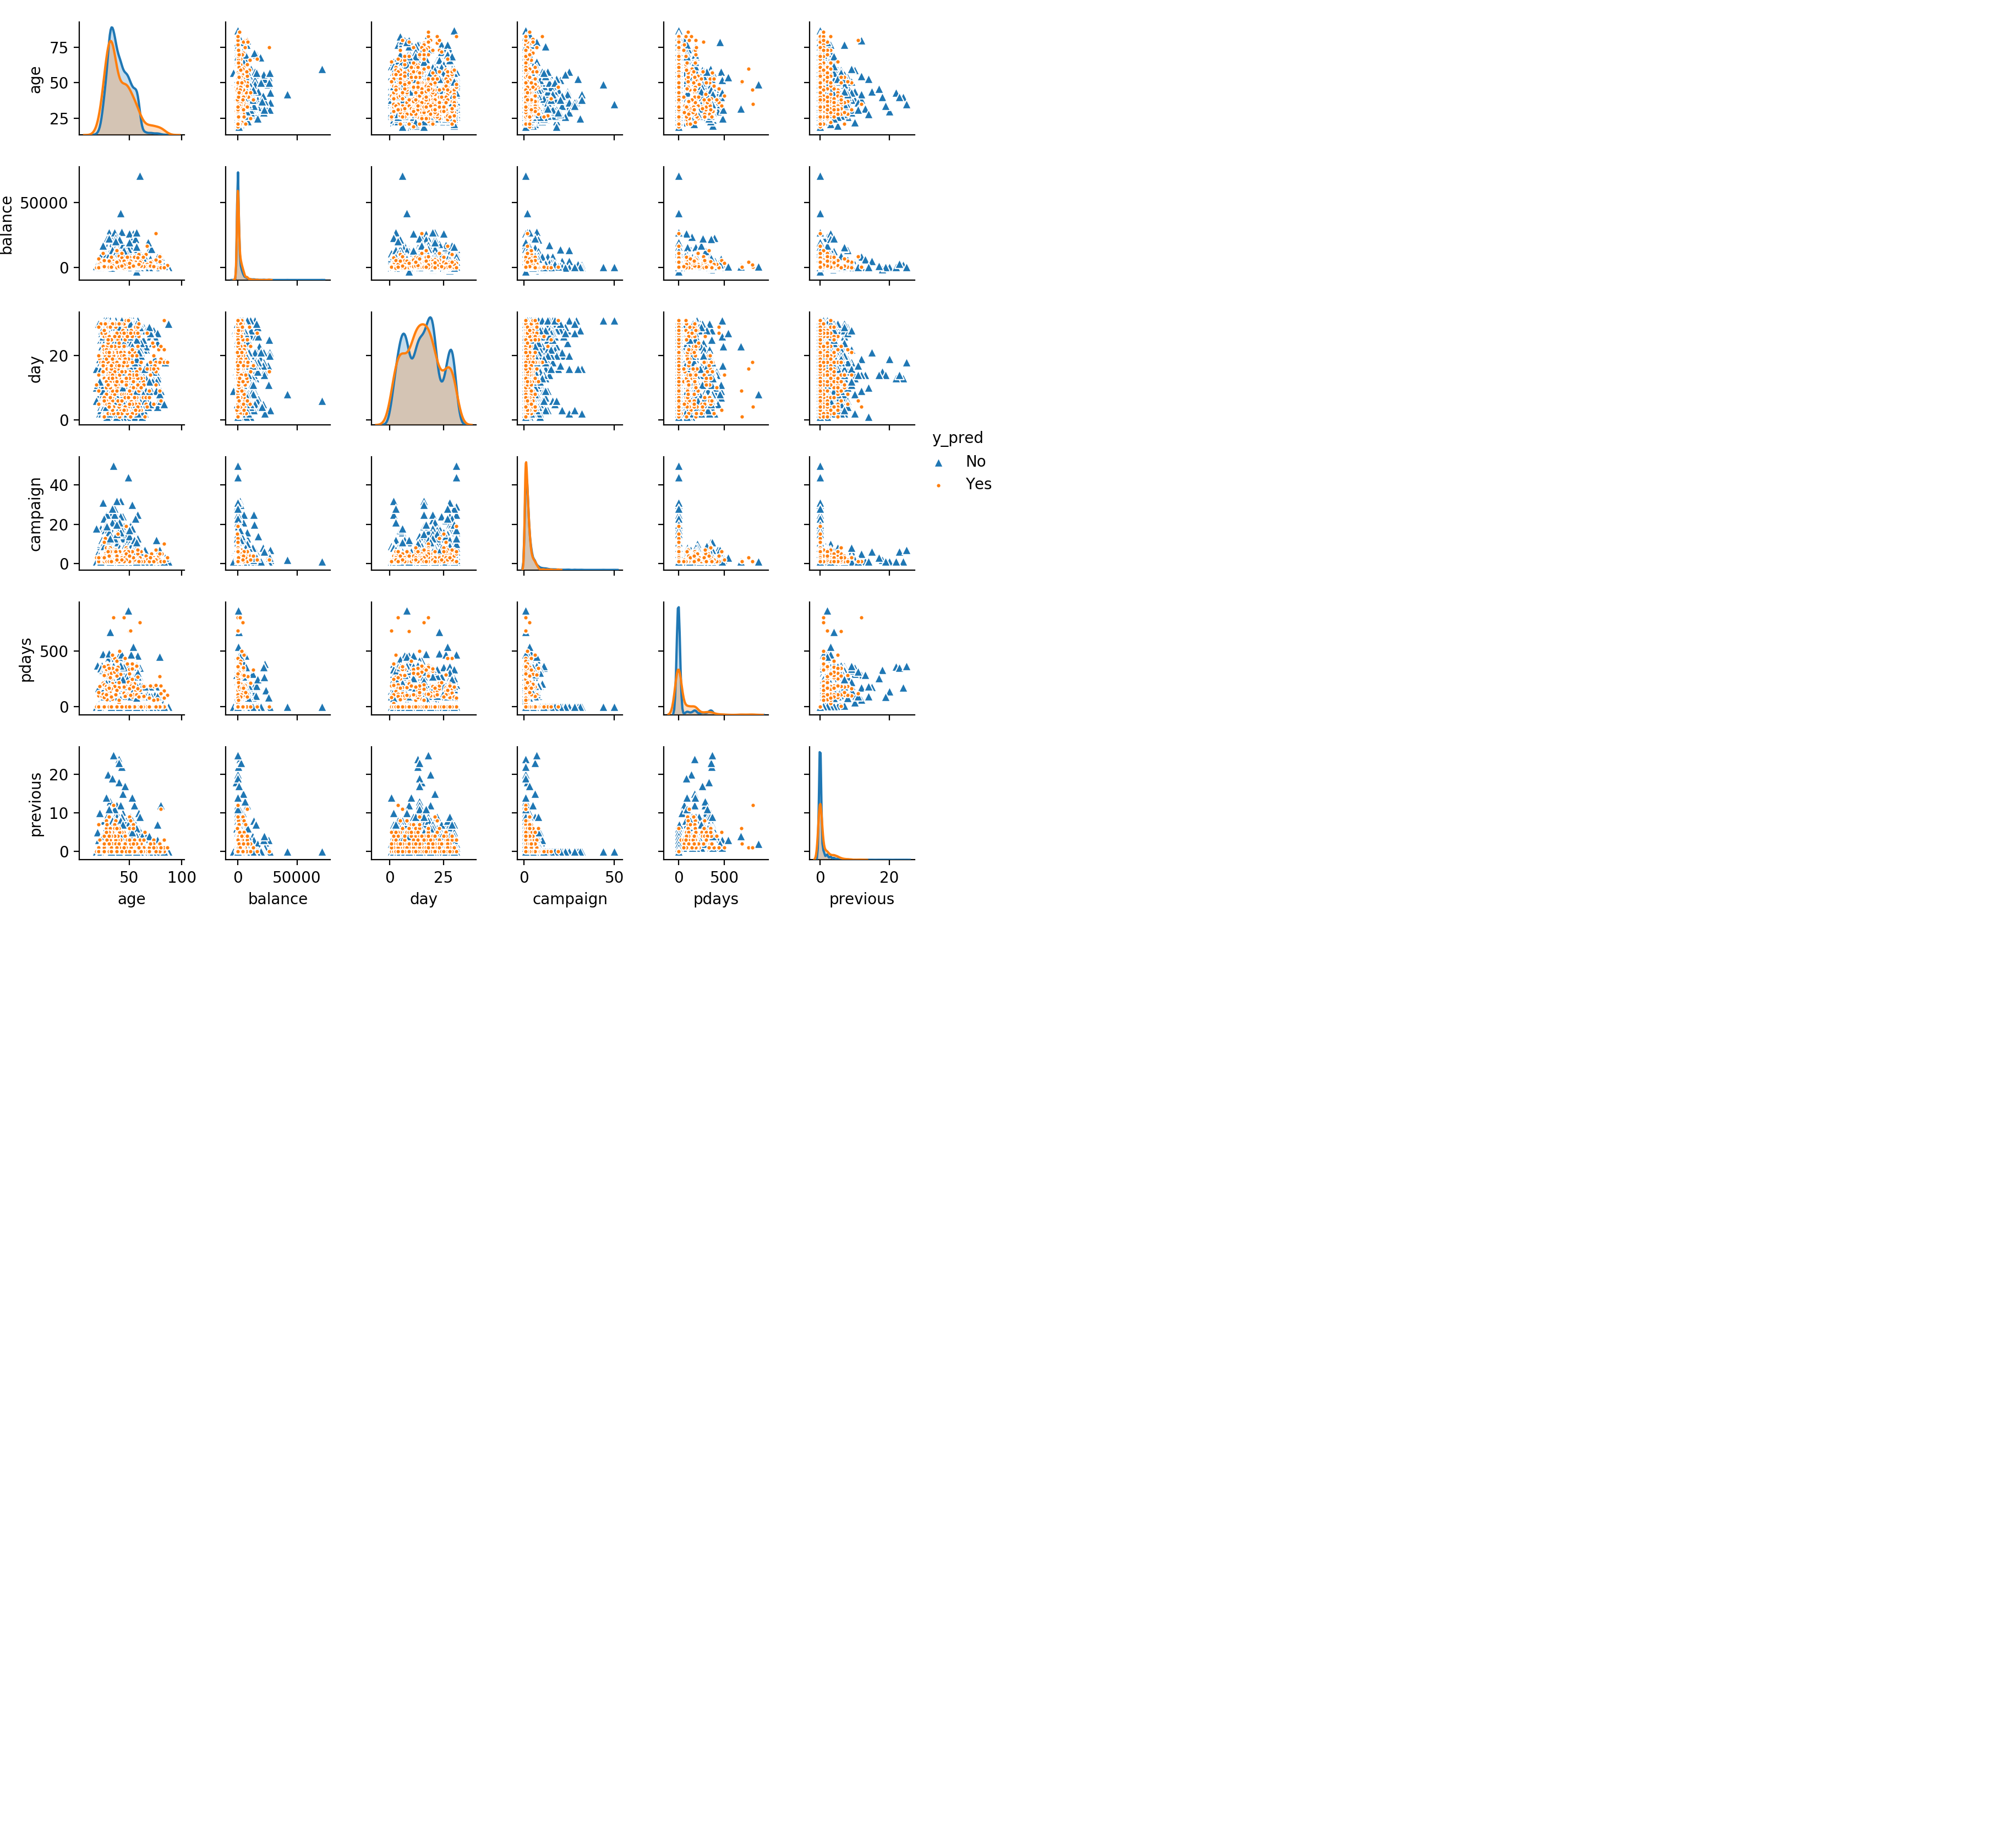

In [25]:

#sns.set(style="ticks", color_codes=True)
#plt.figure(figsize=(10,12))
sns.pairplot(DataPred,hue ='y_pred',height = 1.4,markers = ['^','.'])
plt.show()

### A short explanation

In [26]:
## Shown from the plot, <age, balance> <age, campaign> <day, balance> <campaign, day> 
## give a reasonable seperation of the two classes
## 'age','balance','campaign' and 'day' seem to be the key value to determine the value of y


## SVM (Linear)

### Dataset predicted by SVM

In [27]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=10,class_weight={1:5}) # add weight to solve the unbalanced data
scores = cross_val_score(clf,FeaData.values,LabData2.values,cv=5,scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred = cross_val_predict(clf,FeaData.values, LabData2.values, cv=5)
print(y_pred)

[0.79337017 0.8119469  0.83960177 0.82632743 0.82632743]
Accuracy: 0.82 (+/- 0.03)
[0 1 1 ... 0 1 1]


In [28]:
y_pred = pd.DataFrame(y_pred,columns=['y_pred'])

# replace 0 with 'No'
# replace 1 with 'Yes'
y_pred[y_pred['y_pred'] == 0]= 'No'
y_pred[y_pred['y_pred'] == 1]= 'Yes'

Features = ['age','balance','day','campaign','pdays','previous']
DataPred = pd.DataFrame(X,columns= Features)
DataPred.insert(loc=6,column = 'y_pred',value = y_pred)  ## dataset predicted by SVM
DataPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
age         4521 non-null int64
balance     4521 non-null int64
day         4521 non-null int64
campaign    4521 non-null int64
pdays       4521 non-null int64
previous    4521 non-null int64
y_pred      4521 non-null object
dtypes: int64(6), object(1)
memory usage: 247.3+ KB


In [29]:
DataPred.head()

,age,balance,day,campaign,pdays,previous,y_pred
0,30,1787,19,1,-1,0,No
1,33,4789,11,1,339,4,Yes
2,35,1350,16,1,330,1,Yes
3,30,1476,3,4,-1,0,No
4,59,0,5,1,-1,0,No


In [30]:
DataPred.groupby('y_pred').size()

y_pred
No     4014
Yes     507
dtype: int64

<IPython.core.display.Javascript object>


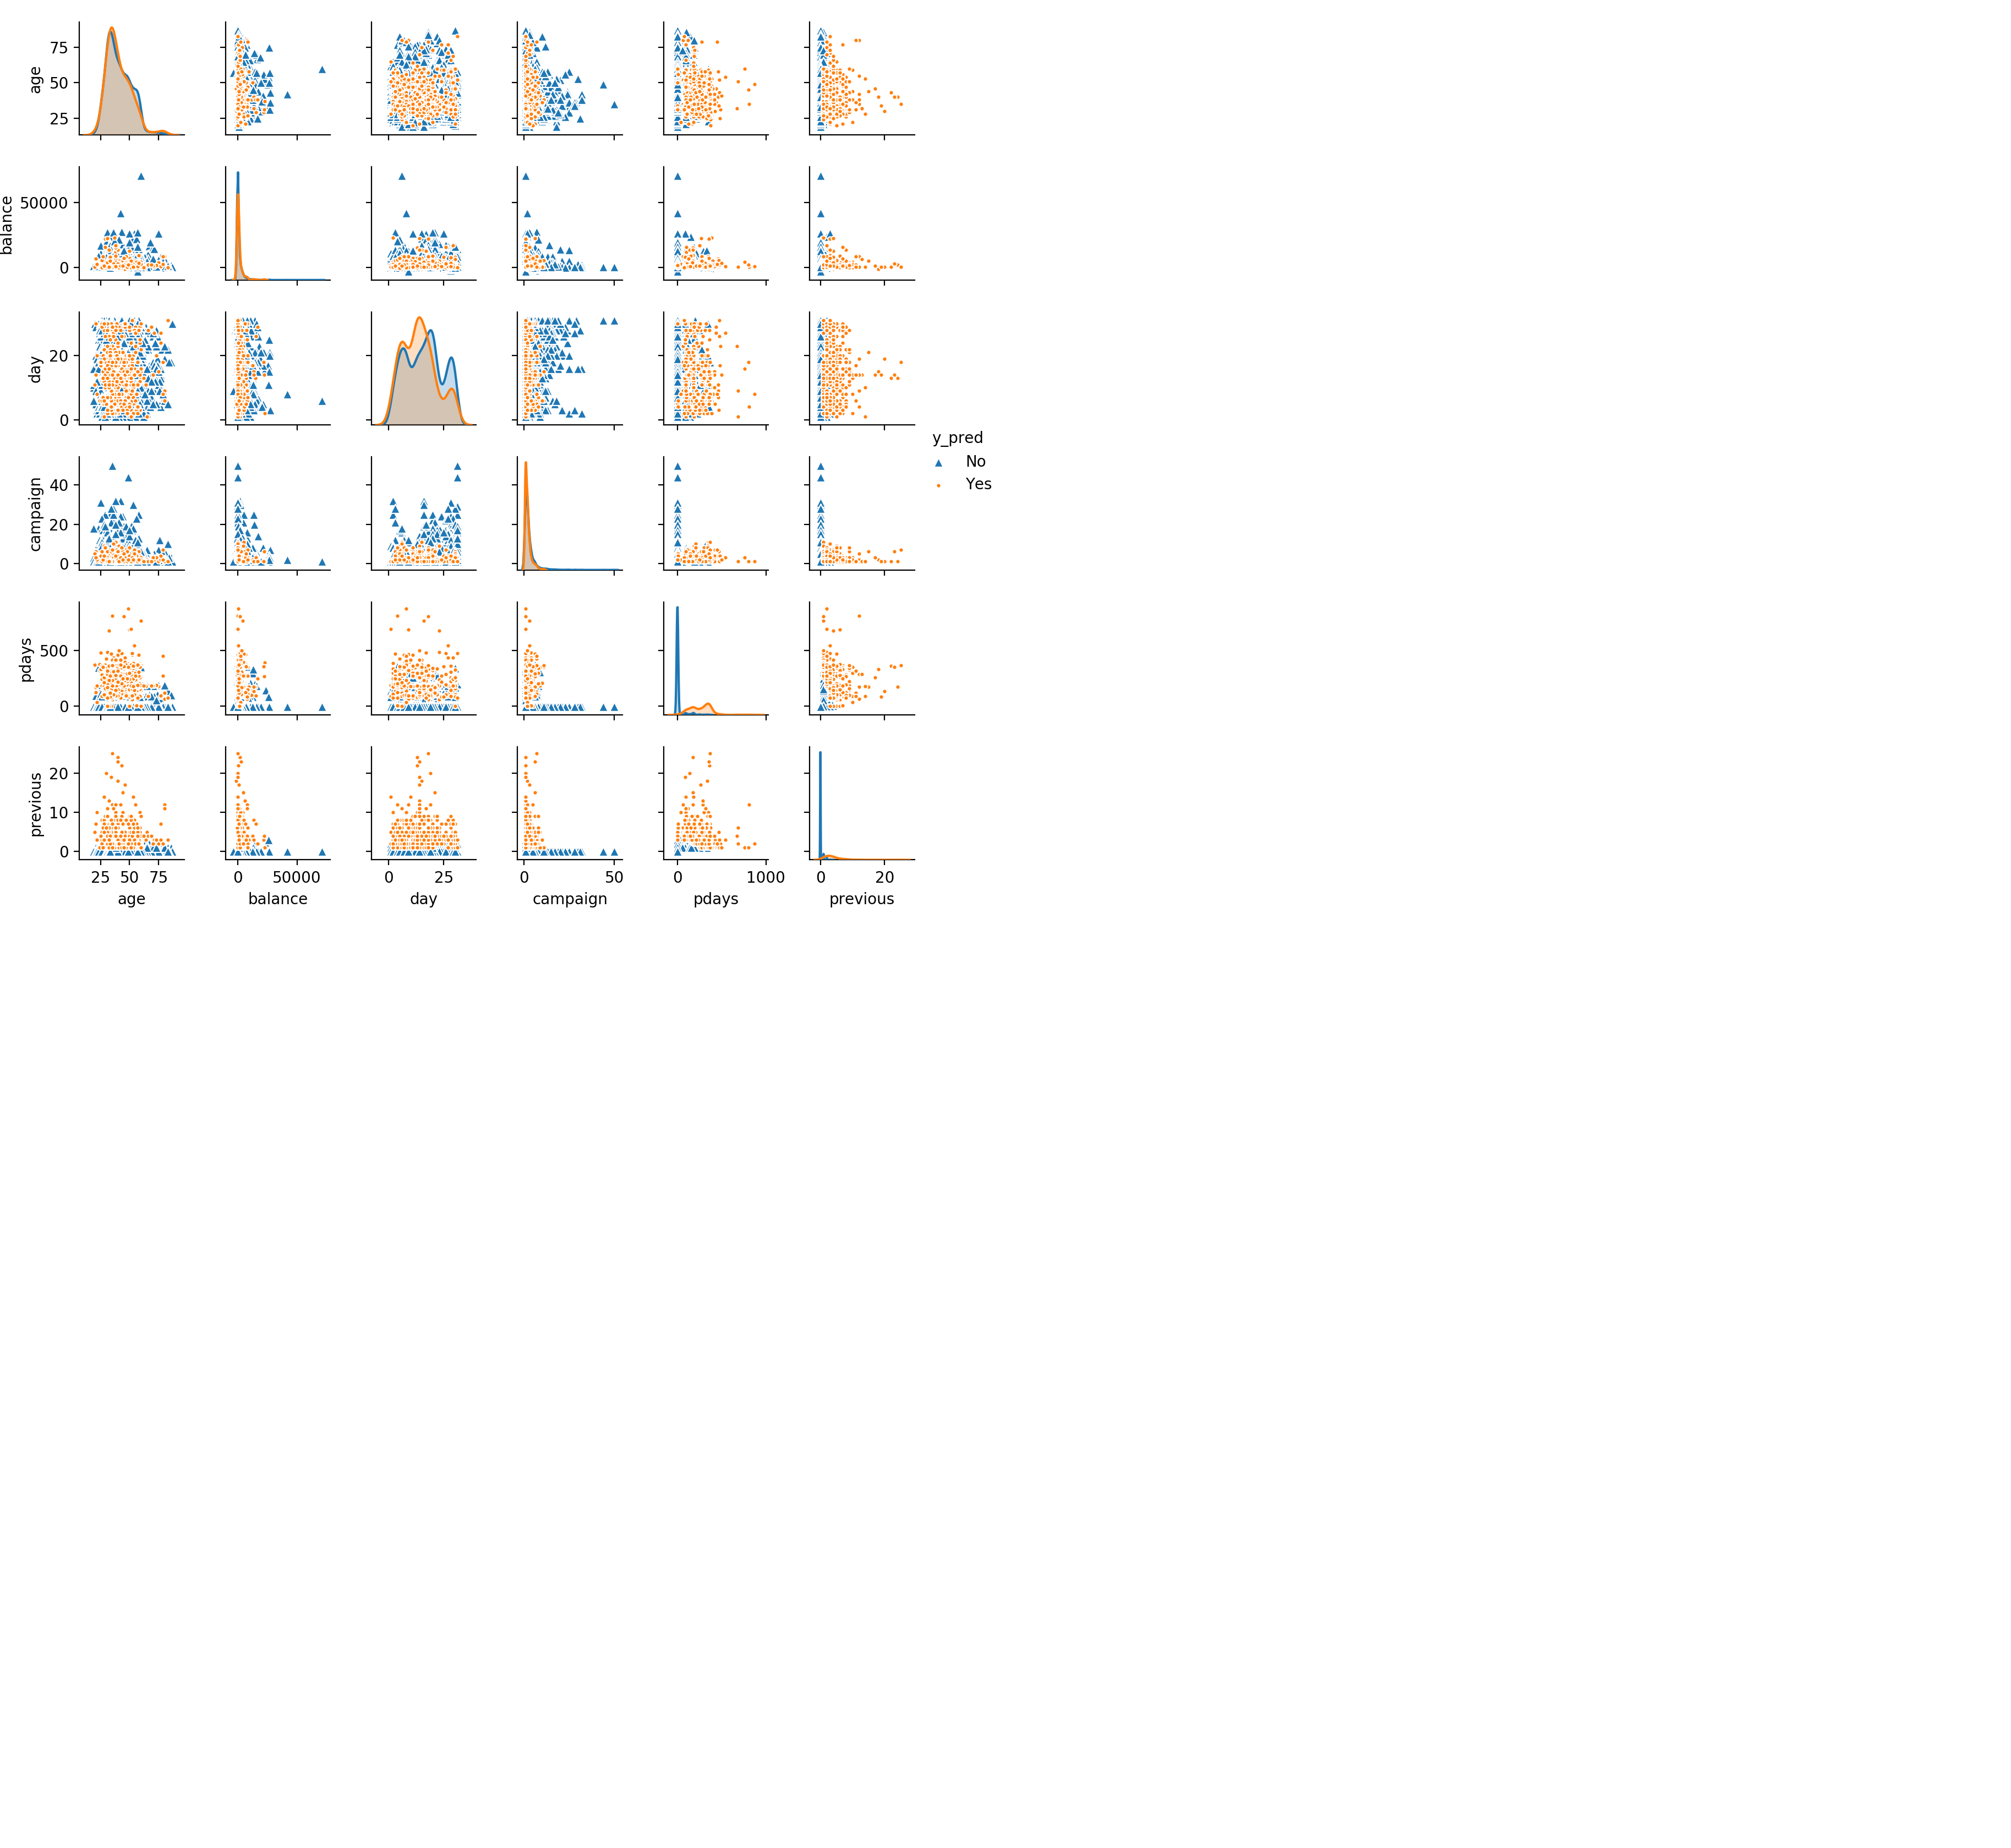

In [31]:
#sns.set(style="ticks", color_codes=True)
#plt.figure(figsize=(10,12))
sns.pairplot(DataPred,hue ='y_pred',height = 1.4, markers = ['^','.'])
plt.show()

### A short explanation 

In [32]:
## Shown from the plot, any tuple that include 'previous' gives a good seperation
## <day, campaign> ,<age campaign>
## 'age','campaign','previous' and 'day' seem to be the key value to determine the value of y